**House Price Prediction using Machine Learning**

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

Importing the California House Price Dataset

In [2]:
# Load California housing dataset
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [3]:
# Load the dataset into a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)
house_price_dataframe['price'] = house_price_dataset.target

In [4]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [5]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
house_price_dataframe.shape

(20640, 9)

In [7]:
# Check for missing values
print("Missing Values:\n", house_price_dataframe.isnull().sum())

Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


In [8]:
# Statistical measures of the dataset
print("\nStatistical Summary:\n", house_price_dataframe.describe())


Statistical Summary:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min      

Understanding the correlation between various features in the dataset
1.   Positive Correlation
2.   Negative Correlation

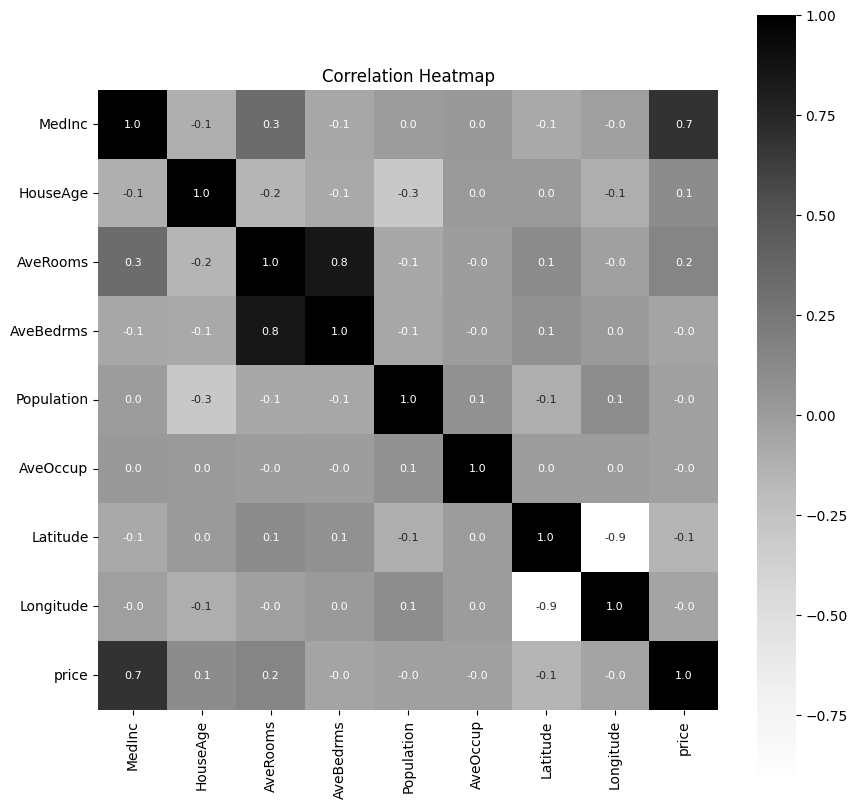

In [14]:
# Correlation heatmap
correlation = house_price_dataframe.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Greys')
plt.title("Correlation Heatmap")
plt.show()

Splitting the data and target

In [15]:
# Splitting the data into features and target
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

Splitting the data into training data and test data

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
# Dictionary to store models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=2),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=2),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=2),
    "AdaBoost": AdaBoostRegressor(random_state=2)
}

In [18]:
# DataFrame to store results
results = pd.DataFrame(columns=["Model", "Train R^2", "Train MAE", "Test R^2", "Test MAE"])

Visualize the actuale prices and predicted prices


Training Linear Regression...
Training R^2 Score: 0.6068205998456939
Training Mean Absolute Error: 0.5303857028686891
Test R^2 Score: 0.6013853272055152
Test Mean Absolute Error: 0.5358292549657769


<ipython-input-19-7771c2a23998>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


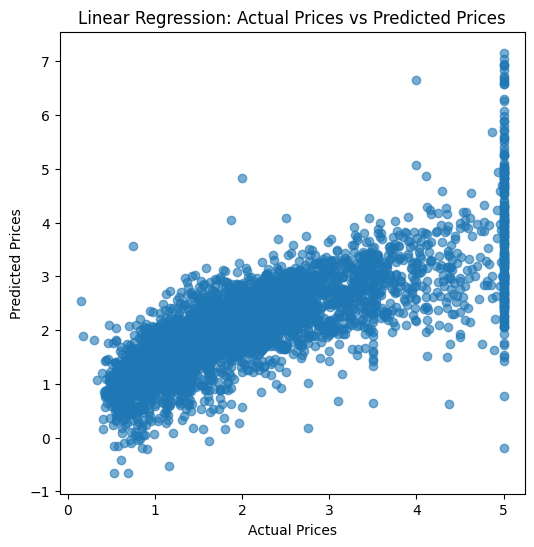


Training Random Forest...
Training R^2 Score: 0.9734927334110559
Training Mean Absolute Error: 0.12164101908309147
Test R^2 Score: 0.8081778065698603
Test Mean Absolute Error: 0.33023999060077536


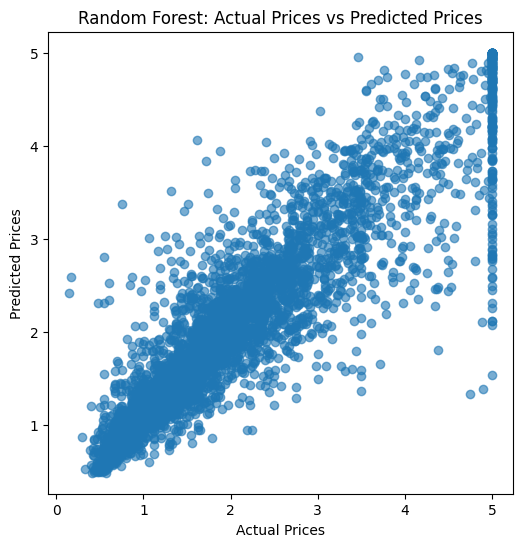


Training Support Vector Regressor...
Training R^2 Score: -0.022011207951733613
Training Mean Absolute Error: 0.8681819553111648
Test R^2 Score: -0.03347034227760237
Test Mean Absolute Error: 0.8741855510969907


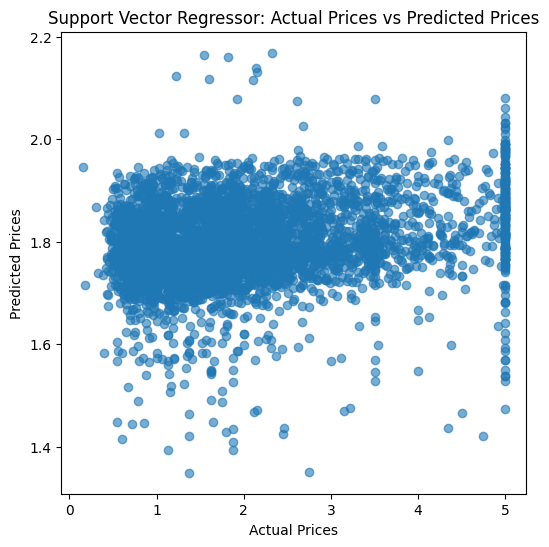


Training XGBoost...
Training R^2 Score: 0.943650140819218
Training Mean Absolute Error: 0.1933648700612105
Test R^2 Score: 0.8338000331788725
Test Mean Absolute Error: 0.3108631800268186


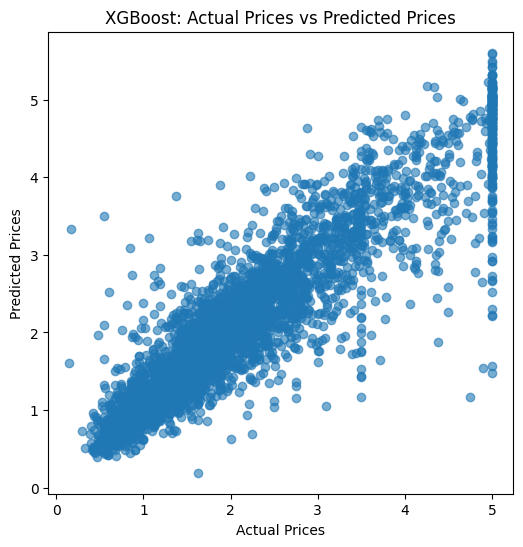


Training Decision Tree...
Training R^2 Score: 1.0
Training Mean Absolute Error: 4.545244456435355e-17
Test R^2 Score: 0.5820252320057087
Test Mean Absolute Error: 0.4722947456395349


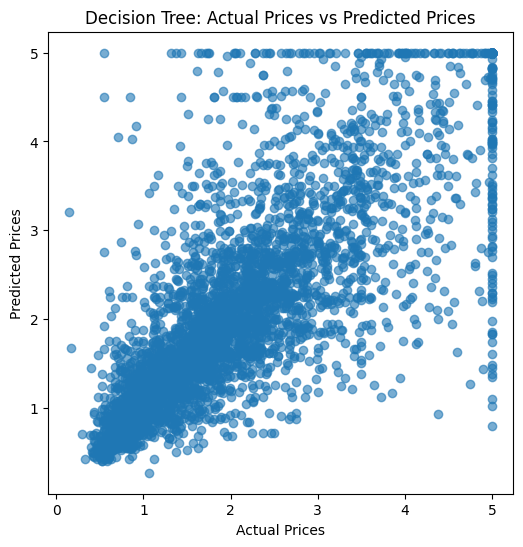


Training K-Nearest Neighbors...
Training R^2 Score: 0.45447983964237726
Training Mean Absolute Error: 0.6541580192587209
Test R^2 Score: 0.15221152883426214
Test Mean Absolute Error: 0.8162307141472869


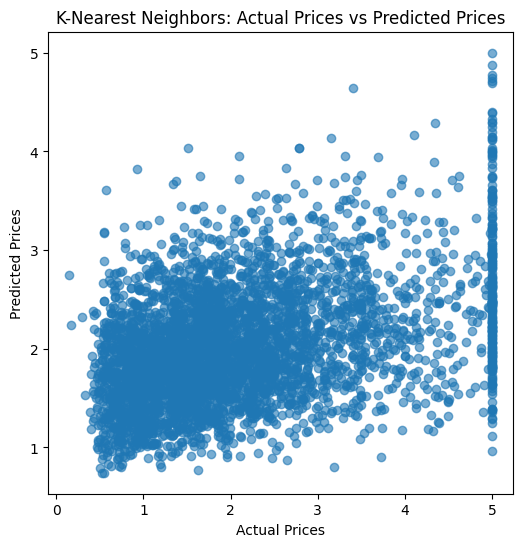


Training Gradient Boosting...
Training R^2 Score: 0.8046570277356265
Training Mean Absolute Error: 0.3569433285770445
Test R^2 Score: 0.7826394723125933
Test Mean Absolute Error: 0.36965763703207977


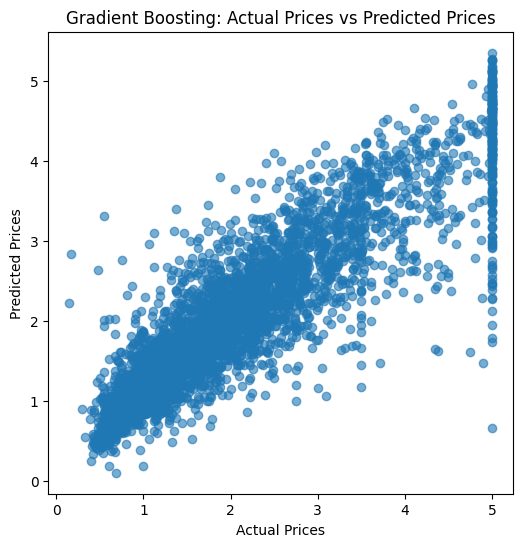


Training AdaBoost...
Training R^2 Score: 0.5251195754867524
Training Mean Absolute Error: 0.6736663060850827
Test R^2 Score: 0.5048369733991088
Test Mean Absolute Error: 0.6875102122086356


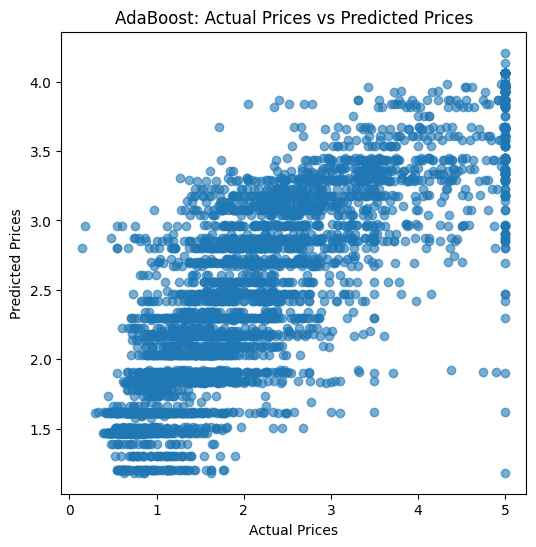

In [19]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, Y_train)

    # Predictions on training data
    train_predictions = model.predict(X_train)

    # Metrics for training data
    train_r2 = metrics.r2_score(Y_train, train_predictions)
    train_mae = metrics.mean_absolute_error(Y_train, train_predictions)

    # Predictions on test data
    test_predictions = model.predict(X_test)

    # Metrics for test data
    test_r2 = metrics.r2_score(Y_test, test_predictions)
    test_mae = metrics.mean_absolute_error(Y_test, test_predictions)

    # Print metrics
    print(f"Training R^2 Score: {train_r2}")
    print(f"Training Mean Absolute Error: {train_mae}")
    print(f"Test R^2 Score: {test_r2}")
    print(f"Test Mean Absolute Error: {test_mae}")

    # Append metrics to results DataFrame using pd.concat
    results = pd.concat([results, pd.DataFrame({
        "Model": [name],
        "Train R^2": [train_r2],
        "Train MAE": [train_mae],
        "Test R^2": [test_r2],
        "Test MAE": [test_mae]
    })], ignore_index=True)

    # Scatter plot for actual vs predicted prices (test data)
    plt.figure(figsize=(6, 6))
    plt.scatter(Y_test, test_predictions, alpha=0.6)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{name}: Actual Prices vs Predicted Prices")
    plt.show()

Comparison Table for all the used models


Model Comparison:
                      Model  Train R^2     Train MAE  Test R^2  Test MAE
0         Linear Regression   0.606821  5.303857e-01  0.601385  0.535829
1             Random Forest   0.973493  1.216410e-01  0.808178  0.330240
2  Support Vector Regressor  -0.022011  8.681820e-01 -0.033470  0.874186
3                   XGBoost   0.943650  1.933649e-01  0.833800  0.310863
4             Decision Tree   1.000000  4.545244e-17  0.582025  0.472295
5       K-Nearest Neighbors   0.454480  6.541580e-01  0.152212  0.816231
6         Gradient Boosting   0.804657  3.569433e-01  0.782639  0.369658
7                  AdaBoost   0.525120  6.736663e-01  0.504837  0.687510


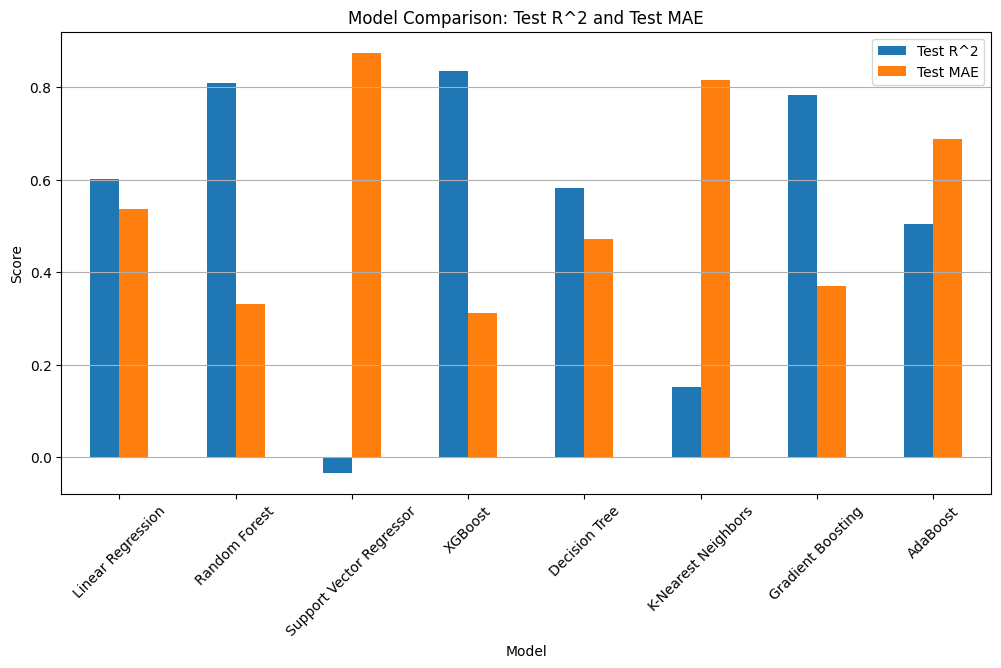

In [20]:
# Display comparison table
print("\nModel Comparison:")
print(results)

# Optional: Plotting the comparison
results.set_index("Model")[["Test R^2", "Test MAE"]].plot(kind="bar", figsize=(12, 6))
plt.title("Model Comparison: Test R^2 and Test MAE")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [21]:
# Define a threshold (e.g., median price of the dataset)
threshold = house_price_dataframe['price'].median()

In [22]:
# Convert target variable to binary classification
Y_binary = (Y > threshold).astype(int)  # 1 if price > threshold, 0 otherwise

In [23]:
# Split the data into training and testing sets for binary classification
X_train, X_test, Y_train_binary, Y_test_binary = train_test_split(X, Y_binary, test_size=0.2, random_state=2)

In [24]:
# Train a model (e.g., XGBoost)
xgb_classifier = XGBRegressor()
xgb_classifier.fit(X_train, Y_train_binary)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
# Predict probabilities for the test set
test_probabilities = xgb_classifier.predict(X_test)

In [26]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test_binary, test_probabilities)
roc_auc = auc(fpr, tpr)

Ploting ROC curve for XGBoost as it performs better

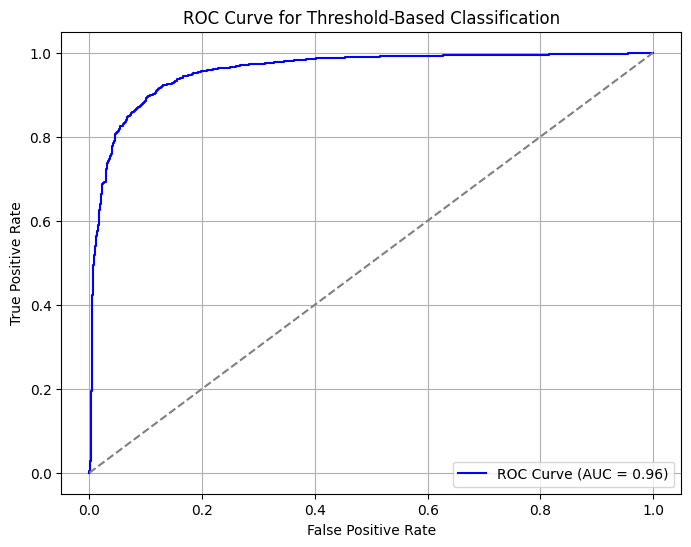

In [27]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title("ROC Curve for Threshold-Based Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()